In [131]:
#!pip install ntscraper

In [132]:
#from ntscraper import Nitter

#scraper = Nitter(log_level=1)

In [133]:
#scraped_tweet = scraper.get_tweets("UltraMilkXStrayKids", mode='hashtag', number=100)

In [134]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/DATA_UM

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/DATA_UM


In [135]:
#save data to json

import json

#with open('result.json', 'w') as fp:
    #json.dump(scraped_tweet, fp)

In [136]:
# Load Json Data

with open('ngertikanrasanya.json') as json_file:
    data = json.load(json_file)

tweet_data = data['tweets']

In [137]:
print(tweet_data[1]['stats'])

{'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 1}


In [138]:
import csv

#to csv
data_file = open('ngertikanrasanya.csv', 'w')

# create the csv writer object
csv_writer = csv.writer(data_file)

# Counter variable used for writing
# headers to the CSV file
count = 0

for tweet in tweet_data:
    if count == 0:

        # Writing headers of CSV file
        header = tweet.keys()
        csv_writer.writerow(header)
        count += 1

    # Writing data of CSV file
    csv_writer.writerow(tweet.values())

data_file.close()

In [139]:
import pandas as pd

dframe = pd.read_csv('ngertikanrasanya.csv')

print(dframe.text)

0      Tebak tebakan seru kali yaaah? Pada bisa jawab...
1      nama squadnya milK-Ching!!! milK karena mereka...
2      kitaaaa adalaaaaaHhhhhhhh CUBE-KKEU KARNA KITA...
3      kool kids!!! 😎😎😎 kayak tmntmnku @zhm416 @yeste...
4      bibimpals!!! bibimbap x pals 😝 #ngertikanrasan...
                             ...                        
671    Ya ampun keren banget ASTRO di Indomil-k K-Cor...
672    #NgertikanRasanya gimana hebohnya ASTRO di Ind...
673    WEEEEIIIIII wajib banget nihhh nonton LETTER F...
674    SENENG DAN KEPO BGT GA SII SURAT SIAPA YANG DI...
675    Kalian nonton Indomil-k K-Corner coba ada ASTR...
Name: text, Length: 676, dtype: object


# **SECTION FOR DATA CLEANING**

In [140]:
import re

In [141]:
df_clean = dframe[['text']]

####1. Penghapusan Punctuations, Angka, Link Website, dan Hashtag

In [142]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [143]:
# Before Remove Punctuation
#dframe.head(10)
df_clean.head(10)

,text
0,Tebak tebakan seru kali yaaah? Pada bisa jawab...
1,nama squadnya milK-Ching!!! milK karena mereka...
2,kitaaaa adalaaaaaHhhhhhhh CUBE-KKEU KARNA KITA...
3,kool kids!!! 😎😎😎 kayak tmntmnku @zhm416 @yeste...
4,bibimpals!!! bibimbap x pals 😝 #ngertikanrasan...
5,Seoulmates!! #NgertiKanRasanya @astridaisa_ @h...
6,geng yang bakal paling hitsss tuh Jjang Squad ...
7,MILKnMATCH squad (geng susu rasa variatif) #Ng...
8,K-yowoK! artinya Ddalgi & The Gengs nih adalah...
9,행미 (Haengmi) 🥰 artinya 행복한 밀크 susu kebahagiaan...


In [144]:
def remove_punct(text):
    # Remove hashtag dan @
    ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    # Remove punctiation
    text  = "".join([char for char in text if char not in string.punctuation])
    # Remove angka
    text = re.sub('[0-9]+', '', text)
    # Remove website link
    text = re.sub(r'http\S+', '', text)

    return text

df_clean['text_punt'] = df_clean['text'].apply(lambda x: remove_punct(x))
df_clean.head(10)

<ipython-input-144-22b4ddc9b774>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_punt'] = df_clean['text'].apply(lambda x: remove_punct(x))


,text,text_punt
0,Tebak tebakan seru kali yaaah? Pada bisa jawab...,Tebak tebakan seru kali yaaah Pada bisa jawab ...
1,nama squadnya milK-Ching!!! milK karena mereka...,nama squadnya milKChing milK karena mereka gen...
2,kitaaaa adalaaaaaHhhhhhhh CUBE-KKEU KARNA KITA...,kitaaaa adalaaaaaHhhhhhhh CUBEKKEU KARNA KITA ...
3,kool kids!!! 😎😎😎 kayak tmntmnku @zhm416 @yeste...,kool kids 😎😎😎 kayak tmntmnku zhm yesterdayjous...
4,bibimpals!!! bibimbap x pals 😝 #ngertikanrasan...,bibimpals bibimbap x pals 😝 ngertikanrasanya a...
5,Seoulmates!! #NgertiKanRasanya @astridaisa_ @h...,Seoulmates NgertiKanRasanya astridaisa heloqiq...
6,geng yang bakal paling hitsss tuh Jjang Squad ...,geng yang bakal paling hitsss tuh Jjang Squad ...
7,MILKnMATCH squad (geng susu rasa variatif) #Ng...,MILKnMATCH squad geng susu rasa variatif Ngert...
8,K-yowoK! artinya Ddalgi & The Gengs nih adalah...,KyowoK artinya Ddalgi The Gengs nih adalah su...
9,행미 (Haengmi) 🥰 artinya 행복한 밀크 susu kebahagiaan...,행미 Haengmi 🥰 artinya 행복한 밀크 susu kebahagiaan 💞...


#### 2. Remove Stopwords

In [145]:
!pip install Sastrawi

In [146]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [147]:
# Indonesian Stopword by Sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [148]:
def remove_stopwords(text):
    text = stopword.remove(text)
    return text

df_clean['text_stop'] = df_clean['text_punt'].apply(lambda x: remove_stopwords(x))
df_clean.head(10)

<ipython-input-148-ee2729099c0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_stop'] = df_clean['text_punt'].apply(lambda x: remove_stopwords(x))


,text,text_punt,text_stop
0,Tebak tebakan seru kali yaaah? Pada bisa jawab...,Tebak tebakan seru kali yaaah Pada bisa jawab ...,Tebak tebakan seru kali yaaah Pada jawab niiih...
1,nama squadnya milK-Ching!!! milK karena mereka...,nama squadnya milKChing milK karena mereka gen...,nama squadnya milKChing milK geng susu Chingu ...
2,kitaaaa adalaaaaaHhhhhhhh CUBE-KKEU KARNA KITA...,kitaaaa adalaaaaaHhhhhhhh CUBEKKEU KARNA KITA ...,kitaaaa adalaaaaaHhhhhhhh CUBEKKEU KARNA KITA ...
3,kool kids!!! 😎😎😎 kayak tmntmnku @zhm416 @yeste...,kool kids 😎😎😎 kayak tmntmnku zhm yesterdayjous...,kool kids 😎😎😎 kayak tmntmnku zhm yesterdayjous...
4,bibimpals!!! bibimbap x pals 😝 #ngertikanrasan...,bibimpals bibimbap x pals 😝 ngertikanrasanya a...,bibimpals bibimbap x pals 😝 ngertikanrasanya a...
5,Seoulmates!! #NgertiKanRasanya @astridaisa_ @h...,Seoulmates NgertiKanRasanya astridaisa heloqiq...,Seoulmates NgertiKanRasanya astridaisa heloqiq...
6,geng yang bakal paling hitsss tuh Jjang Squad ...,geng yang bakal paling hitsss tuh Jjang Squad ...,geng bakal paling hitsss tuh Jjang Squad awes...
7,MILKnMATCH squad (geng susu rasa variatif) #Ng...,MILKnMATCH squad geng susu rasa variatif Ngert...,MILKnMATCH squad geng susu rasa variatif Ngert...
8,K-yowoK! artinya Ddalgi & The Gengs nih adalah...,KyowoK artinya Ddalgi The Gengs nih adalah su...,KyowoK artinya Ddalgi The Gengs nih susu meng...
9,행미 (Haengmi) 🥰 artinya 행복한 밀크 susu kebahagiaan...,행미 Haengmi 🥰 artinya 행복한 밀크 susu kebahagiaan 💞...,행미 Haengmi 🥰 artinya 행복한 밀크 susu kebahagiaan 💞...


####3. Stemming Sentence

In [149]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [150]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [151]:
def stemming_sentence(text):
    text = stemmer.stem(text)
    return text

df_clean['text_stemming'] = df_clean['text_stop'].apply(lambda x: stemming_sentence(x))
df_clean.head(10)

<ipython-input-151-8a3e9041785f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_stemming'] = df_clean['text_stop'].apply(lambda x: stemming_sentence(x))


,text,text_punt,text_stop,text_stemming
0,Tebak tebakan seru kali yaaah? Pada bisa jawab...,Tebak tebakan seru kali yaaah Pada bisa jawab ...,Tebak tebakan seru kali yaaah Pada jawab niiih...,tebak tebak seru kali yaaah pada jawab niiih n...
1,nama squadnya milK-Ching!!! milK karena mereka...,nama squadnya milKChing milK karena mereka gen...,nama squadnya milKChing milK geng susu Chingu ...,nama squadnya milkching milk geng susu chingu ...
2,kitaaaa adalaaaaaHhhhhhhh CUBE-KKEU KARNA KITA...,kitaaaa adalaaaaaHhhhhhhh CUBEKKEU KARNA KITA ...,kitaaaa adalaaaaaHhhhhhhh CUBEKKEU KARNA KITA ...,kitaaaa adalaaaaahhhhhhhh cubekkeu karna kita ...
3,kool kids!!! 😎😎😎 kayak tmntmnku @zhm416 @yeste...,kool kids 😎😎😎 kayak tmntmnku zhm yesterdayjous...,kool kids 😎😎😎 kayak tmntmnku zhm yesterdayjous...,kool kids kayak tmntmnku zhm yesterdayjouska l...
4,bibimpals!!! bibimbap x pals 😝 #ngertikanrasan...,bibimpals bibimbap x pals 😝 ngertikanrasanya a...,bibimpals bibimbap x pals 😝 ngertikanrasanya a...,bibimpals bibimbap x pals ngertikanrasanya ahu...
5,Seoulmates!! #NgertiKanRasanya @astridaisa_ @h...,Seoulmates NgertiKanRasanya astridaisa heloqiq...,Seoulmates NgertiKanRasanya astridaisa heloqiq...,seoulmates ngertikanrasanya astridaisa heloqiq...
6,geng yang bakal paling hitsss tuh Jjang Squad ...,geng yang bakal paling hitsss tuh Jjang Squad ...,geng bakal paling hitsss tuh Jjang Squad awes...,geng bakal paling hitsss tuh jjang squad aweso...
7,MILKnMATCH squad (geng susu rasa variatif) #Ng...,MILKnMATCH squad geng susu rasa variatif Ngert...,MILKnMATCH squad geng susu rasa variatif Ngert...,milknmatch squad geng susu rasa variatif ngert...
8,K-yowoK! artinya Ddalgi & The Gengs nih adalah...,KyowoK artinya Ddalgi The Gengs nih adalah su...,KyowoK artinya Ddalgi The Gengs nih susu meng...,kyowok arti ddalgi the gengs nih susu gemas ng...
9,행미 (Haengmi) 🥰 artinya 행복한 밀크 susu kebahagiaan...,행미 Haengmi 🥰 artinya 행복한 밀크 susu kebahagiaan 💞...,행미 Haengmi 🥰 artinya 행복한 밀크 susu kebahagiaan 💞...,haengmi arti susu bahagia lvndrjsng karinasonl...


####4. Tokenization

In [152]:
!pip install nltk

In [153]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [154]:
from nltk.tokenize import word_tokenize

In [155]:
def tokenization(text):
    word_token = word_tokenize(text)
    return word_token

df_clean['text_token'] = df_clean['text_stemming'].apply(lambda x: tokenization(x.lower()))
df_clean.head(10)

<ipython-input-155-f2ae7788cbeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_token'] = df_clean['text_stemming'].apply(lambda x: tokenization(x.lower()))


,text,text_punt,text_stop,text_stemming,text_token
0,Tebak tebakan seru kali yaaah? Pada bisa jawab...,Tebak tebakan seru kali yaaah Pada bisa jawab ...,Tebak tebakan seru kali yaaah Pada jawab niiih...,tebak tebak seru kali yaaah pada jawab niiih n...,"[tebak, tebak, seru, kali, yaaah, pada, jawab,..."
1,nama squadnya milK-Ching!!! milK karena mereka...,nama squadnya milKChing milK karena mereka gen...,nama squadnya milKChing milK geng susu Chingu ...,nama squadnya milkching milk geng susu chingu ...,"[nama, squadnya, milkching, milk, geng, susu, ..."
2,kitaaaa adalaaaaaHhhhhhhh CUBE-KKEU KARNA KITA...,kitaaaa adalaaaaaHhhhhhhh CUBEKKEU KARNA KITA ...,kitaaaa adalaaaaaHhhhhhhh CUBEKKEU KARNA KITA ...,kitaaaa adalaaaaahhhhhhhh cubekkeu karna kita ...,"[kitaaaa, adalaaaaahhhhhhhh, cubekkeu, karna, ..."
3,kool kids!!! 😎😎😎 kayak tmntmnku @zhm416 @yeste...,kool kids 😎😎😎 kayak tmntmnku zhm yesterdayjous...,kool kids 😎😎😎 kayak tmntmnku zhm yesterdayjous...,kool kids kayak tmntmnku zhm yesterdayjouska l...,"[kool, kids, kayak, tmntmnku, zhm, yesterdayjo..."
4,bibimpals!!! bibimbap x pals 😝 #ngertikanrasan...,bibimpals bibimbap x pals 😝 ngertikanrasanya a...,bibimpals bibimbap x pals 😝 ngertikanrasanya a...,bibimpals bibimbap x pals ngertikanrasanya ahu...,"[bibimpals, bibimbap, x, pals, ngertikanrasany..."
5,Seoulmates!! #NgertiKanRasanya @astridaisa_ @h...,Seoulmates NgertiKanRasanya astridaisa heloqiq...,Seoulmates NgertiKanRasanya astridaisa heloqiq...,seoulmates ngertikanrasanya astridaisa heloqiq...,"[seoulmates, ngertikanrasanya, astridaisa, hel..."
6,geng yang bakal paling hitsss tuh Jjang Squad ...,geng yang bakal paling hitsss tuh Jjang Squad ...,geng bakal paling hitsss tuh Jjang Squad awes...,geng bakal paling hitsss tuh jjang squad aweso...,"[geng, bakal, paling, hitsss, tuh, jjang, squa..."
7,MILKnMATCH squad (geng susu rasa variatif) #Ng...,MILKnMATCH squad geng susu rasa variatif Ngert...,MILKnMATCH squad geng susu rasa variatif Ngert...,milknmatch squad geng susu rasa variatif ngert...,"[milknmatch, squad, geng, susu, rasa, variatif..."
8,K-yowoK! artinya Ddalgi & The Gengs nih adalah...,KyowoK artinya Ddalgi The Gengs nih adalah su...,KyowoK artinya Ddalgi The Gengs nih susu meng...,kyowok arti ddalgi the gengs nih susu gemas ng...,"[kyowok, arti, ddalgi, the, gengs, nih, susu, ..."
9,행미 (Haengmi) 🥰 artinya 행복한 밀크 susu kebahagiaan...,행미 Haengmi 🥰 artinya 행복한 밀크 susu kebahagiaan 💞...,행미 Haengmi 🥰 artinya 행복한 밀크 susu kebahagiaan 💞...,haengmi arti susu bahagia lvndrjsng karinasonl...,"[haengmi, arti, susu, bahagia, lvndrjsng, kari..."


#### Save Data Checkpoint CSV

In [156]:
df_clean.to_csv('ngertikanrasanya.csv', encoding='utf-8', index=False)

#### Word Cloud Generate

In [157]:
!pip install matplotlib
!pip install wordcloud

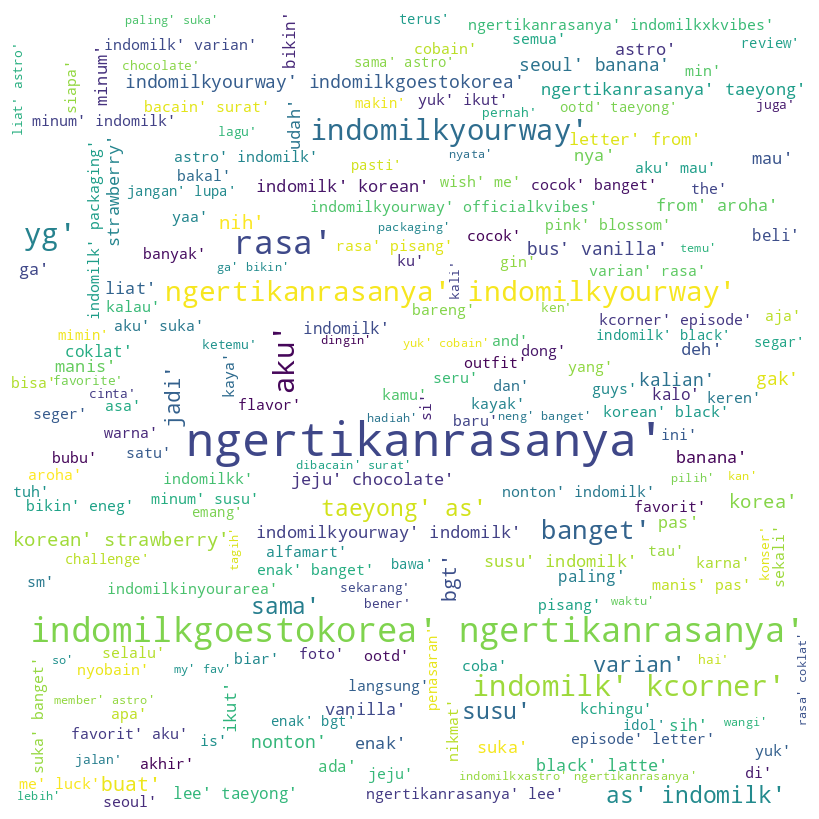

In [158]:
## GENERATE WORD CLOUD

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = df_clean.text_token

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Frequency Word Text

In [159]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [160]:
for sentence in df_clean.text_token:
  #print(sentence)
  for word in sentence:
    #print(word)
    fdist[word] += 1

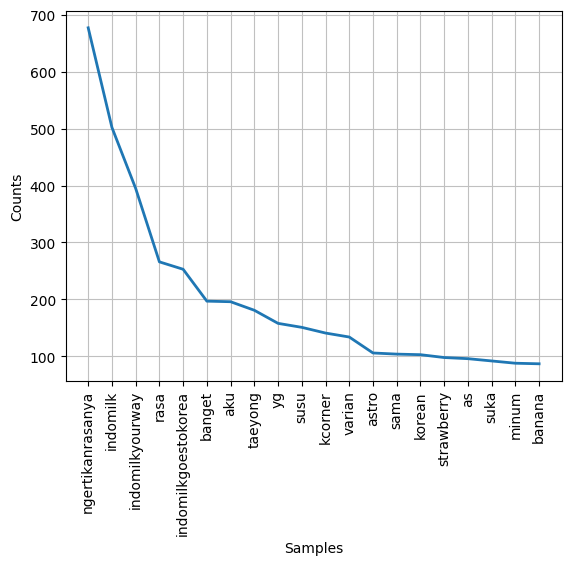

In [161]:
fdist.plot(20)
plt.show()